**IN TODAYS JOB SCENARIO, RESUMES ARE SHORTLISTED USING ATS TRACKER THAT FILTERS THEM BASED ON THE** **TEXT, KEYWORDS ETC PRESENT IN THEM.**

**IN THIS PROJECT WE'LL MAKE SUCH A MODEL THAT CLASSIFIES RESUMES BASED ON JOB CATEGORIES.**

In [5]:
import pandas as pd
data = pd.read_csv("/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv")

In [6]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [38]:
data.shape

(962, 2)

In [39]:
data['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

**JOBWISE DISTRIBUTION OF DATA**

In [40]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

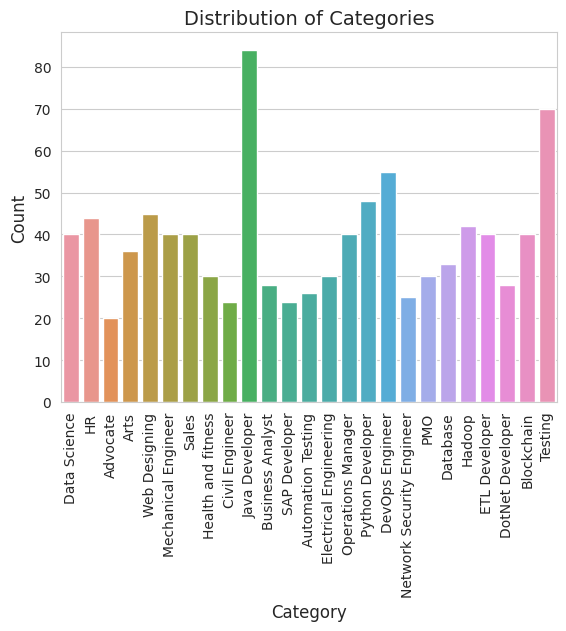

In [41]:
# Set the style
sns.set_style("whitegrid")

# Set the color palette
sns.set_palette("pastel")

# Plot the countplot
sns.countplot(data=data, x='Category')

# Set labels and title
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Categories', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [42]:
data["Resume"][10]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [7]:
import re

In [8]:
#cleaning the resume dataset as we can see above its too much messed up

def clean_resume(text):

    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove non-alphanumeric characters and extra whitespaces
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text)
    # Remove hashtags (words starting with #)
    text = re.sub(r"#\w+", "", text)
    # Remove mentions (words starting with @)
    text = re.sub(r"@\w+", "", text)
    # Remove punctuation and special characters
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"[\n\t\r]", "", text)
    text = re.sub(r"\n", "", text)
    # Convert to lowercase
    text = text.lower()

    return text

In [9]:
data['Resume']=data['Resume'].apply(lambda x: clean_resume(x))

In [46]:
#data after cleaning
data['Resume'][200]

'education details may 1999 to september 2002 diploma mechanical engg mumbai maharashtra institute of mechanical engg may 1998 to may 1999 diploma mechanical engg services ites may 1993 to may 1995 mumbai maharashtra industrial training institute sr executive mechanical engineering automation projects consultant sr executive mechanical engineering automation projects consultant mechanical engineering skill details microsoft office word excel auto cad micro station j erp 3d modeling software exprience 120 monthscompany details company mechanical engineering description role responsibilities application engineering pre sales inside sales provide applications support to inside sales personnel and outside sales channels provide product selection and materials of construction technical recommendations participate in the necessary training activities to establish technical competency also participate in field service trips as directed by top mgmt assist brand managers and or product managers

In [47]:
data.head(3)

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may 2013 to may 2017 b e uit...
2,Data Science,areas of interest deep learning control system...


**NOW WE WILL MOVE TOWARDS MODELLING PROCESS**

In [25]:
#we will use various algorithms to verify the results

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [26]:
# Define algorithms to compare

algorithms = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

In [27]:
# Encoding the text data

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data['Resume'])
y = data['Category']

In [28]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store performance metrics
performance = {}

In [29]:
# Iterate through each algorithm
for name, algorithm in algorithms.items():
    # Training the model
    algorithm.fit(X_train, y_train)
    
    # Making predictions on the test set
    y_pred = algorithm.predict(X_test)
    
    # Evaluating the model
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Storing performance metrics
    performance[name] = {
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1-score": report["weighted avg"]["f1-score"]
    }

In [31]:
# Print the performance metrics

for name, metrics in performance.items():
    print(f"Algorithm: {name}")
    print(f"Precision: {metrics['precision']:.2f}")
    print(f"Recall: {metrics['recall']:.2f}")
    print(f"F1-Score: {metrics['f1-score']:.2f}")
    print()

Algorithm: Logistic Regression
Precision: 1.00
Recall: 0.99
F1-Score: 0.99

Algorithm: Random Forest
Precision: 0.99
Recall: 0.98
F1-Score: 0.98

Algorithm: Support Vector Machine
Precision: 1.00
Recall: 0.99
F1-Score: 1.00



**SO WE CAN SEE THE ACCURACIES OF MODELS AND NOW WE WILL TEST ALL THE ALGORITHMS ON A SAMPLE RESUME**

**THE SAMPLE RESUME IS MINE ONLY AND FROM THE JOB CATEGORIES IN DATASET, IT BELONGS TO DATASCIENCE**

In [22]:
#extraction of pdf content

import PyPDF2

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        num_pages = len(reader.pages)
        for page_num in range(num_pages):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

# Example usage:
pdf_path = "/kaggle/input/sample-resume1/piyush_DA.pdf"  # Replace with the path to your PDF file
resume_text = extract_text_from_pdf(pdf_path)
print(resume_text)

Piyush Rawat  
DATA ANALYST  
B-1/147 , DLF Dilshad ext -2, GZB,  201005 | rawatpiyush3112004@gmail.com  | +918595345865  
www.linkedin.com/in/piyush -rawat -3467b6244  | https://github.com/piyushh31   
EXPERIENCE
 
1. Swalay.in, Data Analyst Intern         (January 202 4 - April 2024)  
• Ensured accuracy and completeness of music metadata, contributing to a 10% improvement in data quality for analysi s 
• Analysed  metadata trends to identify popular music genres and emerging artists, informing strategic decisions that 
resulted in a 15% increase in artist engagement  
• Developed and maintained interactive dashboards for artists, providing actionable insights on streaming performance, 
listener demographics, and geographic distributio n 
2. Talantoncore.in, Content Executive Intern        (January 2021 - January 2022)  
• Formulated and executed content strategy across platforms, resulting in a 20% increase in website traffic and 
engagement  
• Provided prompt customer support, lea

In [23]:
#cleaning resume

testing=clean_resume(resume_text)
print(testing)

piyush rawat data analyst b 1 147 dlf dilshad ext 2 gzb 201005 rawatpiyush3112004 gmail com 918595345865 www linkedin com in piyush rawat 3467b6244 experience 1 swalay in data analyst intern january 202 4 april 2024 ensured accuracy and completeness of music metadata contributing to a 10 improvement in data quality for analysi s analysed metadata trends to identify popular music genres and emerging artists informing strategic decisions that resulted in a 15 increase in artist engagement developed and maintained interactive dashboards for artists providing actionable insights on streaming performance listener demographics and geographic distributio n 2 talantoncore in content executive intern january 2021 january 2022 formulated and executed content strategy across platforms resulting in a 20 increase in website traffic and engagement provided prompt customer support leading to a 25 improvement in user satisfaction and experience managed company dashboards ensuring data integrity for in

In [32]:
# Encoding the sample resume text
sample_resume_encoded = vectorizer.transform([testing])

# Dictionary to store predictions
predictions = {}

# Iterate through each trained model
for name, algorithm in algorithms.items():
    # Get prediction for the sample resume
    prediction = algorithm.predict(sample_resume_encoded)[0]
    predictions[name] = prediction

# Print the predictions
print("Predictions for the sample resume:")
for name, prediction in predictions.items():
    print(f"{name}: {prediction}")

Predictions for the sample resume:
Logistic Regression: Data Science
Random Forest: Data Science
Support Vector Machine: Data Science


**SO MODELS ARE PREDICTING PERFECLTY.**

**ALSO THIS SHOWS MY PROFILE IS PERFECT FOR DATA SCIENCE/ANALYST ROLES :).**